In [17]:
import sys
sys.path.append('../')
import os
#from utils.imageprocessing import 
from models.biomed_UNet.predict import predict_img, plot_img_and_mask, mask_to_image
import torch
from models.biomed_UNet import model as UNet
from PIL import Image

In [18]:
path = './checkpoints_unet-biomed-b6_2024-05-15_15-30/checkpoint_epoch15.pth'
filename = '../data/2024-04-21-dataset/standard/test/images/tile_tif_23_12.png'

In [9]:
net = UNet(n_channels=3, n_classes=2)#, bilinear=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device=device)

state_dict = torch.load(path, map_location=device)

mask_values = state_dict.pop('mask_values', [0, 255])
net.load_state_dict(state_dict)

<All keys matched successfully>

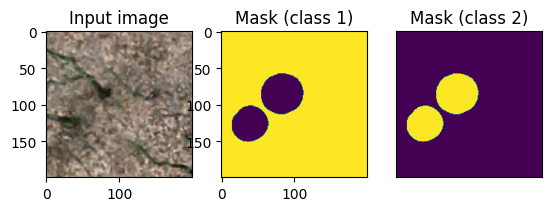

In [10]:
img = Image.open(filename)
mask = predict_img(net=net,
                   full_img=img,
                   scale_factor=1,
                   out_threshold=0.9,
                   device=device)
plot_img_and_mask(img, mask)

In [69]:
mask.max()

1

In [70]:
out_img = mask_to_image(mask,[0, 1])

In [45]:
out_img.save("./test_image.png")

In [12]:
folder = '../data/2024-04-21-dataset/augmentated/orig-test/images'
preds_folder = '../data/2024-04-21-dataset/augmentated/orig-test/biomed-orig-preds'
os.makedirs(preds_folder, exist_ok=True)


for image_path in os.listdir(folder):
    img = Image.open(os.path.join(folder,image_path))
    mask = predict_img(net=net,
                       full_img=img,
                       scale_factor=1,
                       out_threshold=0.9,
                       device=device)
    out_img = mask_to_image(mask,[0, 1])
    x,y = os.path.basename(image_path).split('.')[0].split('_')[2:4]
    out_img.save(os.path.join(preds_folder,f'mask_{x}_{y}.png'))
    

In [14]:
import shutil

In [6]:
shutil.make_archive('predictions-centroid-adam', 'zip', '../data/2024-04-21-dataset/standard/test/predictions-centroid-adam')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/predictions-centroid-adam.zip'

In [15]:
shutil.make_archive('orig-predictions-biomed', 'zip', '../data/2024-04-21-dataset/augmentated/orig-test/biomed-orig-preds')


'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/orig-predictions-biomed.zip'

In [53]:

shutil.make_archive('orig-predictions-centroid', 'zip', '../data/2024-04-21-dataset/augmentated/orig-test/centroid-orig-preds')
shutil.make_archive('orig-predictions-biomed', 'zip', '../data/2024-04-21-dataset/augmentated/orig-test/biomed-orig-preds')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/orig-predictions-biomed.zip'

In [77]:
shutil.make_archive('images', 'zip', '../data/2024-04-21-dataset/standard/test/images')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/images.zip'

In [78]:
shutil.make_archive('masks', 'zip', '../data/2024-04-21-dataset/standard/test/masks')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/masks.zip'

In [79]:
shutil.make_archive('orig_set', 'zip', '../data/2024-04-21-dataset/standard/original')


'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/orig_set.zip'

In [19]:
from models.biomed_UNet import evaluate
from models.biomed_UNet import datasets
from torch.utils.data import DataLoader
from models.biomed_UNet import model as UNet


In [74]:
from models.centroid_UNet import evaluate
from models.centroid_UNet import datasets
from torch.utils.data import DataLoader
from models.centroid_UNet import model as UNet


In [4]:
path = './checkpoints_unet-biomed-b6_2024-05-15_15-30/checkpoint_epoch15.pth'
dataset_path = '../data/2024-04-21-dataset/augmentated/orig-test'

In [86]:
os.listdir('../data/2024-04-21-dataset/augmentated/orig-test')

['masks',
 'images',
 'biomed-orig-preds',
 '.ipynb_checkpoints',
 'centroid-orig-preds']

In [20]:
net = UNet(n_channels=3, n_classes=2)#, bilinear=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device=device)

state_dict = torch.load(path, map_location=device)

mask_values = state_dict.pop('mask_values', [0, 255])
net.load_state_dict(state_dict)

<All keys matched successfully>

In [6]:
loader_args = dict(batch_size=1, num_workers=os.cpu_count(), pin_memory=True)
dataset = datasets.ImageDataset(dataset_path)
dataloader = DataLoader(dataset, shuffle=True, **loader_args)

In [7]:
val_score = evaluate(net, dataloader, device, True)
print(val_score)

tensor(0.5118, device='cuda:0')


tensor(0.3220, device='cuda:0')

In [1]:
import sys
sys.path.append('../')
from models.biomed_UNet import model as UNetModel
from models.biomed_UNet import config as UNetConfig
import torch

/home/ubuntu/miniconda3/envs/gdaltest/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/miniconda3/envs/gdaltest/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [7]:
path = './checkpoints_unet-biomed-b6_2024-05-15_15-30/checkpoint_epoch15.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = UNetConfig(n_channels=3, n_classes=2, bilinear=False)
model = UNetModel(config)
state_dict = torch.load(path, map_location=device)
mask_values = state_dict.pop('mask_values', [0, 255])
model.load_state_dict(state_dict)

<All keys matched successfully>

In [9]:
save_directory = "./biomed_benchmark"
model.save_pretrained(save_directory)
#model.config.save_pretrained(save_directory)

In [2]:
unet_model = UNetModel.from_pretrained("./biomed_benchmark")

In [7]:
from huggingface_hub import HfApi, Repository, create_repo
# Create repository and upload to Hugging Face Model Hub
save_directory = "./biomed_benchmark"
repository_id = "aerial-image-categorization/tree-detection_biomed-benchmark"  # Replace with your username and desired repository name
#create_repo(repo_id=repository_id)
repo = Repository(local_dir=save_directory, clone_from=repository_id)
repo.push_to_hub(commit_message="Initial commit")

/home/ubuntu/miniconda3/envs/gdaltest/lib/python3.8/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)


OSError: Looks like you do not have git-lfs installed, please install. You can install from https://git-lfs.github.com/. Then run `git lfs install` (you only have to do this once).

In [1]:
import sys
sys.path.append('../')
from models.biomed_UNet import model as UNetModel
import torch

/home/ubuntu/miniconda3/envs/gdaltest/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/miniconda3/envs/gdaltest/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
model = UNetModel.from_pretrained("aerial-image-categorization/tree-detection_biomed-benchmark")

/home/ubuntu/miniconda3/envs/gdaltest/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Downloading: "https://huggingface.co/aerial-image-categorization/tree-detection_biomed-benchmark/resolve/main/pytorch_model.bin" to /home/ubuntu/.cache/torch/hub/checkpoints/pytorch_model.bin
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118M/118M [00:02<00:00, 57.6MB/s]


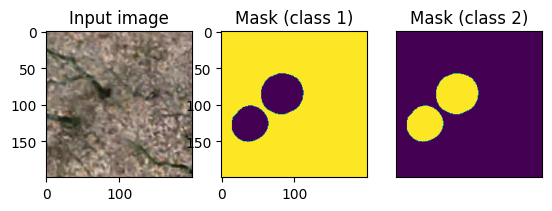

In [7]:
from models.biomed_UNet.predict import predict_img, plot_img_and_mask, mask_to_image
from PIL import Image
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img = Image.open(filename)
mask = predict_img(net=model,
                   full_img=img,
                   scale_factor=1,
                   out_threshold=0.9,
                   device=device)
plot_img_and_mask(img, mask)